<a href="https://colab.research.google.com/github/milenalebe/simulacion/blob/master/Random_Numbers_Generators_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

GENERADORES DE NUMEROS ALEATORIOS

In [19]:

""" impementacion del medio del cuadrado recursiva"""

numbersMS = [] # lista de numeros aleatorios

def randNumbersMidSquare(seed, n, numbers = numbersMS):
    
    while (len(numbers)< n):
      x = seed**2
      ceros = "0" * (8 - len(str(x))) # obtiene la cantidad de ceros para que sea de 8 digitos
      x = ceros + str(x)
      numbers.append(int(x[2:6])) #toma los 4 nros del medio
      seed = numbers[-1]
    return numbers

#randNumbersMidSquare(seed = 6923, n = (255*255))

#print(numbersMS)



In [ ]:
""" implementacion del medio del cuadrado con lambda"""

def randNumbersMidSquareLambda(seed, n):
    ret = [seed]
    pad = lambda x: "0"*(8-len(x))+x # define una funcion de una unica linea
    while len(ret)<n+1:
        ret.append(int(pad(str(ret[-1]**2))[2:6]))
    return ret[1:]


In [21]:
"""generador lineal congruencial recursivo (limita a una cantidad máxima de n) """


numbersGLCRecursion = [] # lista de numeros aleatorios

m = 256
a = 3
c = 173
x0 = 78
n = 600


def randNumberGLCRecursion(seed = x0, n = n,m = m,a = a ,c = c, numbers = numbersGLCRecursion):
    
    if len(numbers) == n:
        return numbers
    b =(seed * a + c)
    x = b%m

    numbers.append(x) 
    return randNumberGLCRecursion(seed = int(numbers[-1]), n = n, numbers = numbers)

#numbersGLCRecursion = randNumberGLCRecursion()

#print(numbersGLCRecursion)

In [10]:
"GLC"


numbersGLC = [] # lista de numeros aleatorios

m = 2**16
#m = 2**32
#a = 3
a = 3
c = 137
x0 = 97
n = 255**2

# m>0 / 0 < a < m 
# 0 <= c < m / 0 <= x0 < m

def randNumberGLC(seed = x0, n = n,m = m,a = a ,c = c):
    numbers = []
    while len(numbers) != n: 
      x = (seed * a + c)%m
      numbers.append(x) 
      seed = x

    return numbers

numbersGLC = randNumberGLC()

#print(numbersGLC)


TESTEO NUMEROS GENERADOS

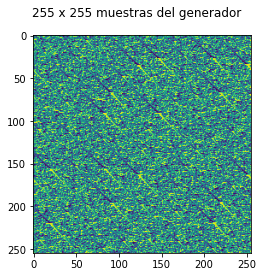

In [11]:
"mapa de bits"

import numpy as np
import matplotlib.pyplot as plt



#matrixGLC = np.array(numbersMS).reshape((255,255))
matrixMS = np.array(numbersGLC).reshape(255,255)

fig = plt.figure()
fig.suptitle('255 x 255 muestras del generador')
plt.imshow(matrixMS)

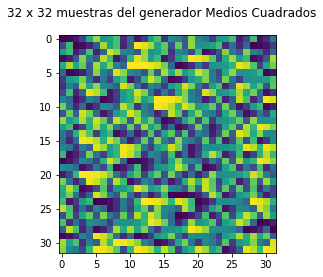

In [13]:
matrixMS = np.array(numbersGLC[:(32*32)]).reshape(32,32)

fig = plt.figure()
fig.suptitle('32 x 32 muestras del generador Medios Cuadrados')
plt.imshow(matrixMS)

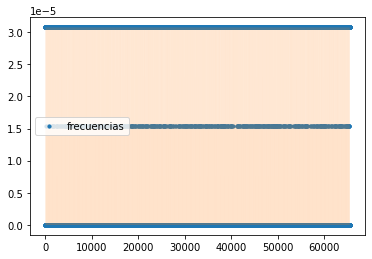

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# scatter frecuencia relativa de cada tirada

def frecuenciasAbsolutas(distribucion, maxN):
        frecuencias = []
        for n in range(maxN): 
            cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
            frecuencias.append(cantidad_n)
        return frecuencias
# 
def frecAbsDict(distribucion, maxN):
  frecDict = {}
  for n in range(maxN): 
    cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
    frecDict.update({n:cantidad_n})#agrego las frecuencias relativas con sus respectivos numeros 
  return frecDict

  

#print(frecAbsDict(numbersGLC, m))
#frecAbs = frecuenciasAbsolutas(numbersGLC, m)
frecAbs = frecuenciasAbsolutas(numbersGLC, m)
frec = np.array(frecAbs)/n
x = np.arange(len(frec))
fig, ax = plt.subplots()
ax.scatter(x, frec, label = 'frecuencias', s = 10)
ax.legend()
ax.fill_between(x, np.zeros(len(frec)), frec, alpha = 0.4)
plt.show()

In [16]:
#prueba chi cuadrado GLC

import scipy.stats as stats

frec_esperada = np.array([(n/m) for i in range (m)])
frec_abs = np.array(frecAbs)

# calculando la suma 

print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)



65531.98429834432


Power_divergenceResult(statistic=65531.984298346775, pvalue=0.5025885278569938)

In [ ]:
# prueba chi cuadrado MS

import scipy.stats as stats

frec_esperada = np.array([(n/m) for i in range (m)])
frec_abs = np.array(frecAbs)

# calculando la suma 
print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)


50.48


Power_divergenceResult(statistic=50.48, pvalue=1.0049193415946907e-05)

In [ ]:
import scipy.stats as stats

numbersMS2 = numbersMS[:20]

frec_esperada = np.array([(len(numbersMS2)/max(numbersMS2)) for i in range (max(numbersMS2))])
frec_abs = np.array(frecAbs)

# calculando la suma 
print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)


27312.00000000599


Power_divergenceResult(statistic=27312.0, pvalue=0.0)

In [ ]:
import scipy.stats as stats

numbersMS2 = numbersMS[:3]

frec_esperada = np.array([(len(numbersMS2)/max(numbersMS2)) for i in range (max(numbersMS2))])
frec_abs = np.array(frecAbs)

# calculando la suma 
print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)

frec_esperada


182505.00000004316


array([0.0003012, 0.0003012, 0.0003012, ..., 0.0003012, 0.0003012,
       0.0003012])

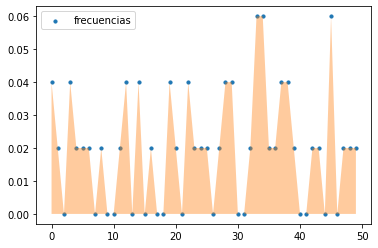

38.0


Power_divergenceResult(statistic=38.0, pvalue=0.8725439183746351)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# scatter frecuencia relativa de cada tirada
numerosPy = {}
numerosPy = np.random.randint(0,50,50)
numPy=numerosPy.tolist()

def frecuenciasAbsolutas(distribucion, maxN):
        frecuencias = []
        for n in range(maxN): 
            cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
            frecuencias.append(cantidad_n)
        return frecuencias
# 
def frecAbsDict(distribucion, maxN):
  frecDict = {}
  for n in range(maxN): 
    cantidad_n = distribucion.count(n) # cuenta la cantidad de veces que aparece cada n en resultados 
    frecDict.update({n:cantidad_n})#agrego las frecuencias relativas con sus respectivos numeros 
  return frecDict

  

#print(frecAbsDict(numbersGLC, m))
#frecAbs = frecuenciasAbsolutas(numbersGLC, m)
m=50
n=50
frecAbs = frecuenciasAbsolutas(numPy, m)
frec = np.array(frecAbs)/n
x = np.arange(len(frec))
fig, ax = plt.subplots()
ax.scatter(x, frec, label = 'frecuencias', s = 10)
ax.legend()
ax.fill_between(x, np.zeros(len(frec)), frec, alpha = 0.4)
plt.show()

frec_esperada = np.array([(n/m) for i in range (m)])
frec_abs = np.array(frecAbs)

# calculando la suma 

print(sum(((frec_esperada - frec_abs)**2)/frec_esperada))
stats.chisquare(frecAbs, f_exp=frec_esperada)